# Client Retention Demo
Simple demo to show Anaconda functionality on the mainframe accessing mainframe data with the Optimized Data Layer client, dsdbc.

In [1]:
# To use dsdbc, if you have the necessary files virtualized into ODL, simply set csv to False
csv = True

if not csv:
    import dsdbc #This package required to interface with ODL

import pandas as pd
import numpy as np
#Remove font warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", category=PendingDeprecationWarning)

## Setup Mainframe Data Connections
This step will setup the Optimized Data Layer client connection to access mainframe data and load them into Panadas DataFrames.

In [2]:
if not csv:
    conn = dsdbc.connect()
    cursor = conn.cursor()

***Client Data***

Load client data into a Pandas DataFrame.

In [3]:
#Create pandas dataframe directly from "DB" query (really a pysical sequential dataset)
if csv:
    client_df = pd.read_csv("C:/Machine learning/Customer churn/examples/python/data/CLIENT_INFO_VSAMKSDS.csv")
else:
    client_df = pd.read_sql('SELECT * FROM CLIENT_INFO_VSAMKSDS', conn)
client_df = client_df.set_index("CONT_ID")
client_df

,Unnamed: 0,GENDER,AGE_YEARS,HIGHEST_EDU,ANNUAL_INVEST,ANNUAL_INCOME,ACTIVITY_LEVEL,CHURN
CONT_ID,,,,,,,,
1009548420,0,0,35.88,1,0.0,17054.0,3,0
1009548430,1,1,41.45,1,0.0,13180.0,4,0
1009548440,2,0,57.86,4,0.0,21009.0,2,0
1009548450,3,1,34.14,1,0.0,20766.0,4,1
1009548460,4,1,41.89,4,0.0,22140.0,4,0
1009548470,5,0,33.18,1,0.0,20564.0,1,1
1009548480,6,0,44.80,1,0.0,21858.0,1,1
1009548490,7,0,68.87,1,0.0,37425.0,1,1
1009548500,8,1,80.13,4,0.0,17753.0,2,0


***Credit transactions***

Load credit card transactions into a Pandas DataFrame.

In [4]:
if csv:
    txn_df = pd.read_csv("C:/Machine learning/Customer churn/examples/python/data/SPPAYTB_VSAM-1.csv")
    txn_df2 = pd.read_csv("C:/Machine learning/Customer churn/examples/python/data/SPPAYTB_VSAM-2.csv")
    txn_df = txn_df.append(txn_df2)
    txn_df3 = pd.read_csv("C:/Machine learning/Customer churn/examples/python/data/SPPAYTB_VSAM-3.csv")
    txn_df = txn_df.append(txn_df3)
else:
    txn_df = pd.read_sql('SELECT * FROM SPPAYTB_VSAM', conn)

In [5]:
txn_df['AUREQ_TX_DT_TTLAMT'] = pd.to_numeric(txn_df['AUREQ_TX_DT_TTLAMT'])
txn_df['CONT_ID'] = txn_df['CONT_ID'].astype('int64')
txn_df['HDR_CREDTT'] = pd.to_datetime(txn_df['HDR_CREDTT'])

In [6]:
txn_df['DATE'] = txn_df['HDR_CREDTT'].apply(lambda x: x.date())

In [7]:
txn_df

,Unnamed: 0,HDR_CREDTT,AUREQ_ENV_A_ID_ID,AUREQ_ENV_M_ID_ID,AUREQ_ENV_M_CMONNM,AUREQ_ENV_CPL_PAN,AUREQ_ENV_C_CARDBRND,AUREQ_TX_MRCHNTCTGYC,AUREQ_TX_DT_TTLAMT,CONT_ID,MDM_POSTAL_CODE_ID,AGE,AUTHORRESULT_RSPNT,FRAUD_VER_RESULT,FILLER1,DATE
0,0,2013-03-27 17:05:42.000000000,BancaItaliana,C0120580915711418,AllFood,1009577753,Debit Card,5711,65.27,1009577750,C012058091,48,APPR,N,,2013-03-27
1,1,2013-03-27 17:05:46.000000000,BancaItaliana,C01908402757117,TuttoePiu,1009568273,Debit Card,5711,70.88,1009568270,C019084027,65,APPR,N,,2013-03-27
2,2,2013-03-27 17:05:49.000000000,BancaItaliana,C00301520557116,Incrocio,1009530123,Debit Card,5711,65.54,1009530120,C003015205,58,APPR,N,,2013-03-27
3,3,2013-03-27 17:05:50.000000000,BancaItaliana,C01205801857111,TuttoePiu,1009555853,Debit Card,5711,52.34,1009555850,C012058018,32,APPR,N,,2013-03-27
4,4,2013-03-27 17:05:55.000000000,BancaItaliana,C01506200757111,Incrocio,1009559023,Debit Card,5711,61.27,1009559020,C015062007,57,APPR,N,,2013-03-27
5,5,2013-03-27 17:05:58.000000000,BancaItaliana,C01807807157111,Incrocio,1009563303,Debit Card,5711,50.20,1009563300,C018078071,36,APPR,N,,2013-03-27
6,6,2013-03-27 17:05:58.000000001,BancaItaliana,C006030129571131,TuttoePiu,1009570193,Debit Card,5711,63.94,1009570190,C006030129,32,APPR,N,,2013-03-27
7,7,2013-03-27 17:06:02.000000000,BancaItaliana,C01506206457111,Incrocio,1009558653,Debit Card,5711,123.94,1009558650,C015062064,62,APPR,N,,2013-03-27
8,8,2013-03-27 17:06:12.000000000,BancaItaliana,C0190820535711244,AllFood,1009541493,Debit Card,5711,81.62,1009541490,C019082053,60,APPR,N,,2013-03-27
9,9,2013-03-27 17:06:16.000000000,BancaItaliana,C0120580915711588,TuttoePiu,1009543343,Debit Card,5711,36.17,1009543340,C012058091,56,APPR,N,,2013-03-27


## Aggregate statistics
Calculate a few aggregate statistics based on credit transactions and join the results to the client data DataFrame.

In [8]:
# Total txns per customer
total_txns_df = txn_df.groupby('CONT_ID').size().rename("TOTAL_TXNS").to_frame()
client_df = client_df.join(total_txns_df)

In [9]:
# Total transaction amounts per customer
total_txn_amount_df = txn_df.groupby('CONT_ID')['AUREQ_TX_DT_TTLAMT'].sum().rename("TOTAL_TXN_AMOUNT").to_frame()
client_df = client_df.join(total_txn_amount_df)

In [10]:
# Avg transaction amounts per customer
avg_txn_amount_df = txn_df.groupby('CONT_ID')['AUREQ_TX_DT_TTLAMT'].mean().rename("AVG_TXN_AMOUNT").to_frame()
client_df = client_df.join(avg_txn_amount_df)

In [11]:
# Average daily txns per customer
daily_txns = txn_df.groupby(['DATE', 'CONT_ID']).size()

In [12]:
# Missing txns on a particular day means customer had none.
# These days should be included in the avg as 0 transaction days.
avg_daily_txns_df = daily_txns.unstack().fillna(0).mean().rename("AVG_DAILY_TXNS").to_frame()
client_df = client_df.join(avg_daily_txns_df)

## Show Results

In [13]:
client_df

,Unnamed: 0,GENDER,AGE_YEARS,HIGHEST_EDU,ANNUAL_INVEST,ANNUAL_INCOME,ACTIVITY_LEVEL,CHURN,TOTAL_TXNS,TOTAL_TXN_AMOUNT,AVG_TXN_AMOUNT,AVG_DAILY_TXNS
CONT_ID,,,,,,,,,,,,
1009548420,0,0,35.88,1,0.0,17054.0,3,0,244,7881.25,32.300205,0.666667
1009548430,1,1,41.45,1,0.0,13180.0,4,0,243,6594.37,27.137325,0.663934
1009548440,2,0,57.86,4,0.0,21009.0,2,0,242,9200.33,38.017893,0.661202
1009548450,3,1,34.14,1,0.0,20766.0,4,1,240,9051.61,37.715042,0.655738
1009548460,4,1,41.89,4,0.0,22140.0,4,0,240,9534.37,39.726542,0.655738
1009548470,5,0,33.18,1,0.0,20564.0,1,1,240,9064.67,37.769458,0.655738
1009548480,6,0,44.80,1,0.0,21858.0,1,1,241,8993.22,37.316266,0.658470
1009548490,7,0,68.87,1,0.0,37425.0,1,1,242,14457.52,59.741818,0.661202
1009548500,8,1,80.13,4,0.0,17753.0,2,0,242,7985.14,32.996446,0.661202


***Note: importing pymon packages will fail, because they are not currently installed.  To install them, run the following command***

```conda install matplotlib```

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

### Plot X vs. Y
We begin our exploration of the data set by creating some scatterplots of each column vs. the others.

In [16]:
def jointplot(x, y, data, **kwargs):
    size = kwargs.pop('size', 10)
    alpha = kwargs.pop('alpha', 0.3)
    return sns.jointplot(x=x, y=y, data=data, 
                         alpha=alpha,
                         size=size,
                         **kwargs)

# for widget
def w_jointplot(x, y):
    g = jointplot(x, y, filter_outliers(client_df, by_col=y))
    plt.close()
    return g.fig

In [17]:
churn_labels = ['Did not churn', 'Did churn']

def filter_outliers(d, by_col=None):
    if isinstance(d, pd.
                  Series):
        return d[((d-d.mean()).abs()<=3*d.std())]
    elif isinstance(d, pd.DataFrame):
        if not by_col:
            raise ValueError('by_col is required for DataFrame')
        return d[np.abs(d[by_col]-d[by_col].mean())<=(3*d[by_col].std())] 

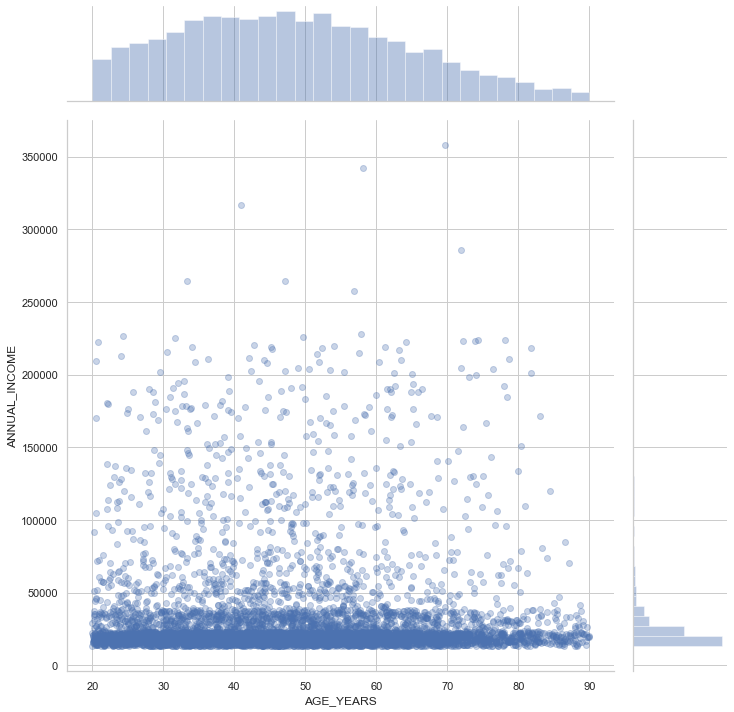

In [18]:
ax = jointplot('AGE_YEARS', 'ANNUAL_INCOME', filter_outliers(client_df, by_col='ANNUAL_INCOME'))

### Correlations
Next, we compute the correlation coefficients between each variable.

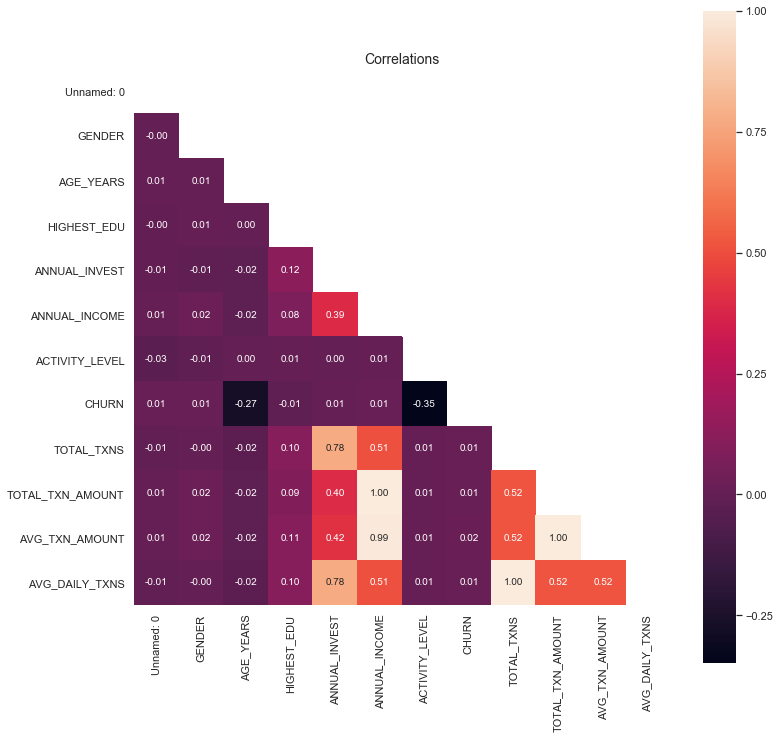

In [19]:
corr = client_df.corr()

# only show lower triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='.2f',
                 cbar=True,
                 ax=ax)
title = ax.set_title('Correlations', size=14)

## Churn
We plot the distributions of clients who churned and those that did not on the same axes.

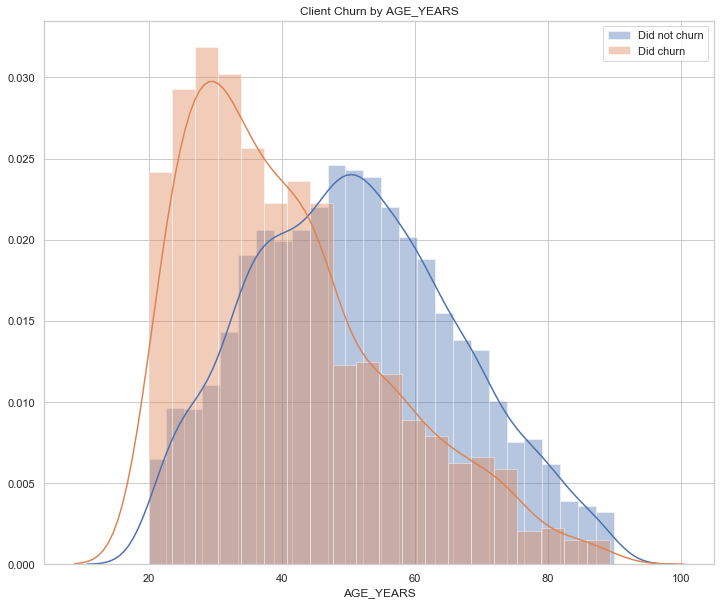

In [20]:
def plot_churn_by(df, col, **kwargs):
    f, ax = plt.subplots(figsize=(12,10), sharex=True)
    kde = kwargs.get('kde', False)
    hist = kwargs.get('hist', False)
    for churn in df.CHURN.unique():
        sns.distplot(df[df.CHURN == churn][col], 
                     label=churn_labels[churn], 
                     kde_kws={'shade': (kde and not hist)},
                     ax=ax, 
                     **kwargs)

    ax.set_title('Client Churn by {}'.format(col))
    label = ax.set_xlabel('{}'.format(col))
    return f, ax

def w_plot_churn_by(column, hist=True, kde=False, norm_hist=False):
    df = filter_outliers(client_df, by_col=column)
    f, ax = plot_churn_by(df, column, hist=hist, kde=kde, norm_hist=norm_hist)
    plt.legend()
    plt.close()
    return f

f, ax = plot_churn_by(client_df, 'AGE_YEARS')
ax = plt.legend()

The two features that showed a negative correlation with churn were age and activity level. Here we generate a boxplot with those two features as the axes, and churn as the category.
The plot shows that clients that churn tend to be younger across all levels of activity.

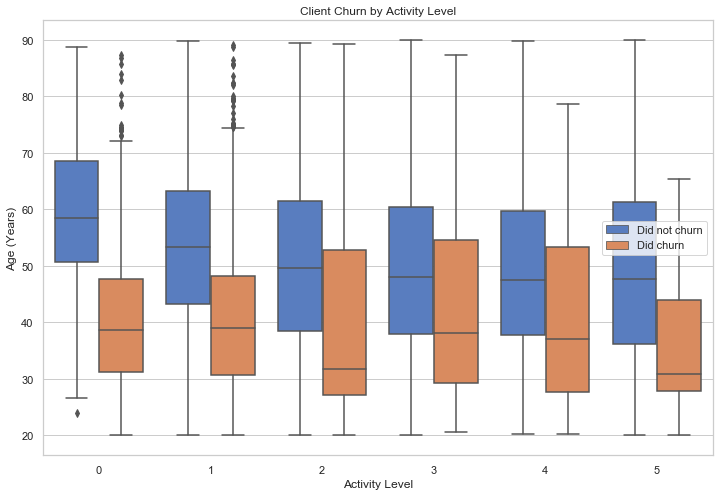

In [21]:
col = 'AGE_YEARS'
data = filter_outliers(client_df, by_col=col)

f, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x='ACTIVITY_LEVEL', y=col, hue="CHURN", data=data, 
                 palette='muted', ax=ax)
title = ax.set_title('Client Churn by Activity Level')
label = ax.set_ylabel('Age (Years)')
label = ax.set_xlabel('Activity Level')
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, churn_labels)

This beeswarm plot shows clients binned by the level of activity they maintain with the bank. Clients that churned maintained lower levels of activity (0-2). And of clients within these lower activity levels, younger clients churned more than others.

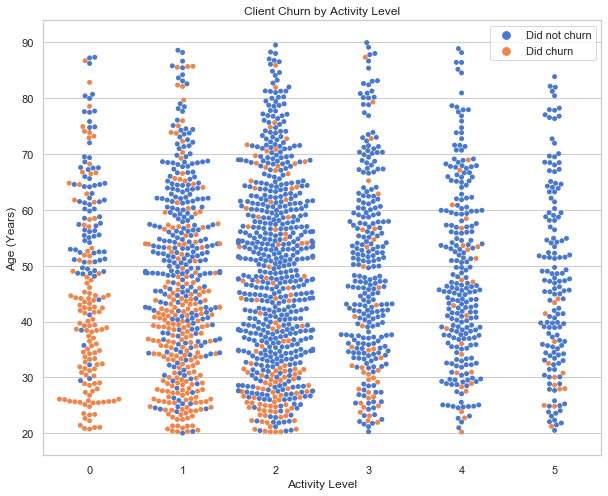

In [22]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.swarmplot(x='ACTIVITY_LEVEL', y='AGE_YEARS', hue='CHURN', 
                   data=data.sample(n=2000, random_state=51), 
                   palette='muted', ax=ax)
title = ax.set_title('Client Churn by Activity Level')
label = ax.set_ylabel('Age (Years)')
label = ax.set_xlabel('Activity Level')
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, churn_labels)

## Train churn model
Train a churn classifier, which we'll use to predict the probability that a client will churn.
To keep things simple, we use a single data set, which we split into training and test data sets. We use the training data to train the model, and the test data to make projections about lost revenue to the bank.

In [25]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
def make_feature_space(df):
    '''Create the feature space required by our classifier.'''
    # drop columns/features we don't want/need for the classifier
    features_df = df.drop(['CHURN', 'CUSTOMER_ID'], axis=1, errors='ignore')
    X = features_df.as_matrix().astype(np.float)
    # normalize feature values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

def predict_churn(X):
    '''Predict the probabilit of churn from feature set.'''
    return clf.predict_proba(X)[:,1]

def train_model(X, y):
    '''Train our classifier using features X and target variable y.'''
    clf = RF(n_estimators=100)
    return clf.fit(X, y)

def init_model(df):
    # split data into train, test sets
    train_index, test_index = train_test_split(df.index, random_state=99)
    train_df = client_df.ix[train_index]
    test_df = client_df.ix[test_index]

    # target variable
    y = np.array(train_df['CHURN'])

    # extract features
    X = make_feature_space(train_df)

    # train classifier
    clf = train_model(X, y)

    return clf, test_df

After training the model, we are left with the churn classifier and the test data set, which we'll use for our churn predictions.

In [27]:
clf, test_df = init_model(client_df)

## Calculate business loss
In this simple example, we calculate the projected loss of business (revenue) to BigBank for all clients in the test data set. We calculate BigBank's revenue from each client, and multiply that by the churn probability to determine the predicted loss.

In [28]:
def calc_business_loss(df):
    #df['customer_id'] = df.index
    data = df.copy()

    # extract features
    X = make_feature_space(df)
    
    # predict churn
    data['churn_probability'] = predict_churn(X)
    
    # TODO: avg_daily_balance would be a nice feature to have here
    # for now, we'll just use fraction of income
    avg_daily_balance = df['ANNUAL_INCOME'] / 6

    # Interest made on deposits
    deposit_rate = 0.02

    # Fee collected for each credit txn
    credit_rate = 0.015

    # Assume we make some money on trading fees and/or portfolio management
    mgmt_rate = 0.02

    # How much is each customer worth to the business?
    worth = deposit_rate * avg_daily_balance + \
            mgmt_rate * df['ANNUAL_INVEST'] + \
            credit_rate * df['TOTAL_TXN_AMOUNT']
    data['worth'] = worth
    
    # How much would we lose per annum?
    data['predicted_loss'] = data['churn_probability'] * worth
    
    return data.sort_values(by='predicted_loss', ascending=False)

In [29]:
churn_df = calc_business_loss(test_df)
churn_df.head()

,Unnamed: 0,GENDER,AGE_YEARS,HIGHEST_EDU,ANNUAL_INVEST,ANNUAL_INCOME,ACTIVITY_LEVEL,CHURN,TOTAL_TXNS,TOTAL_TXN_AMOUNT,AVG_TXN_AMOUNT,AVG_DAILY_TXNS,churn_probability,worth,predicted_loss
CONT_ID,,,,,,,,,,,,,,,
1009534260,4585,1,23.00,2,94881.0,3217364.0,1,1,336,579071.01,1723.425625,0.918033,0.78,21308.231817,16620.420817
1009578040,2962,1,77.60,5,90798.0,743981.0,0,0,361,148178.37,410.466399,0.986339,0.51,6518.572217,3324.471830
1009572850,2443,0,24.08,2,117746.0,127814.0,1,1,276,29691.62,107.578333,0.754098,0.78,3226.340967,2516.545954
1009564350,1593,0,31.61,2,102495.0,174984.0,1,1,292,37669.01,129.003459,0.797814,0.77,3198.215150,2462.625666
1009552030,361,0,31.70,2,79156.0,225412.0,1,1,316,47881.05,151.522310,0.863388,0.75,3052.709083,2289.531812


## Loss by Age Group
In this section, we calculate and plot the projected loss of revenue by age group. In our data set, age is an important feature in predicting if a client will churn.
First we create a DataFrame containing the cumulative predicted loss by age group.

In [30]:
def group_by_age(df, bins=None):
    if bins is None:
        bin_size = 5
        _min, _max = int(df.AGE_YEARS.min()), int(df.AGE_YEARS.max())
        bins = range(_min, _max + bin_size, 5)
    return df.groupby(pd.cut(df.AGE_YEARS, bins=bins))

data_by_age = churn_df.pipe(group_by_age)
data_by_age['predicted_loss'].sum().reset_index()

,AGE_YEARS,predicted_loss
0,"(20, 25]",38750.185152
1,"(25, 30]",28735.546877
2,"(30, 35]",30063.373673
3,"(35, 40]",22813.260053
4,"(40, 45]",17422.947220
5,"(45, 50]",23020.725315
6,"(50, 55]",20152.681099
7,"(55, 60]",10924.840893
8,"(60, 65]",12048.719804
9,"(65, 70]",10604.670669


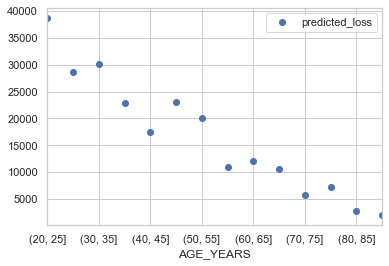

In [31]:
loss_by_age_df = data_by_age['predicted_loss'].sum().reset_index()
loss_by_age_df['AGE_YEARS'] = loss_by_age_df['AGE_YEARS'].astype(str)

loss_by_age_df.plot(x='AGE_YEARS', y='predicted_loss', style='o')